In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
ds = pd.read_csv('AirPassengers.csv')

In [3]:
ds.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
ds.rename(columns= {'#Passengers':'Passengers'}, inplace=True)

In [5]:
ds.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
type(ds.Month[0])

str

In [7]:
ds.dtypes

Month         object
Passengers     int64
dtype: object

In [8]:
ds = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])

In [9]:
ds.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [10]:
ds = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [11]:
ds.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

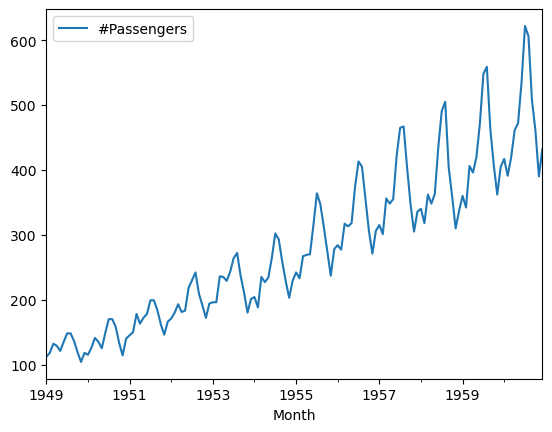

In [12]:
ds.plot()

<Axes: xlabel='Month'>

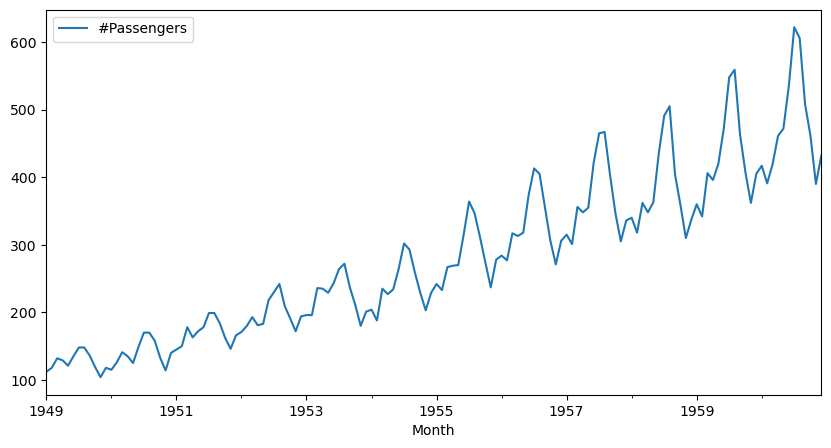

In [13]:
ds.plot(figsize=(10,5))
# Here we can see through the graph that this is seasonal trend, But graph shows the seasonality is not constant
# Hence we use multiplicative model i.e we use log transform function

In [14]:
ds['1949-03-01':'1949-05-01']

,#Passengers
Month,
1949-03-01,132
1949-04-01,129
1949-05-01,121


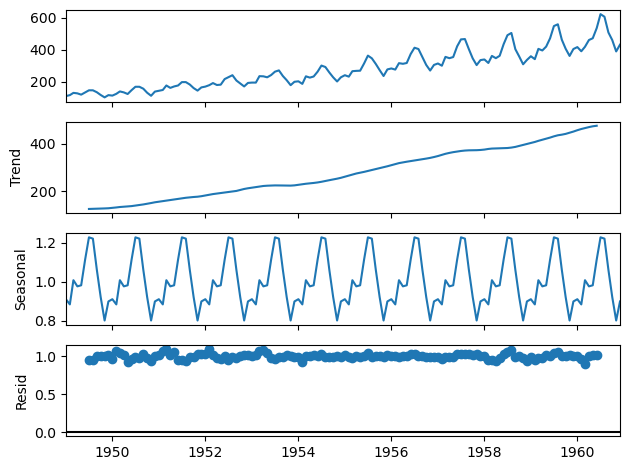

In [15]:
# Decompose the time series multiplicatively

ds_mul_decompose = seasonal_decompose(ds, model='multiplicative')
ds_mul_decompose.plot()
plt.show()

In [16]:
ds_log =ds

In [17]:
ds_log['Pax'] = np.log(ds)

In [18]:
ds_log.Pax

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

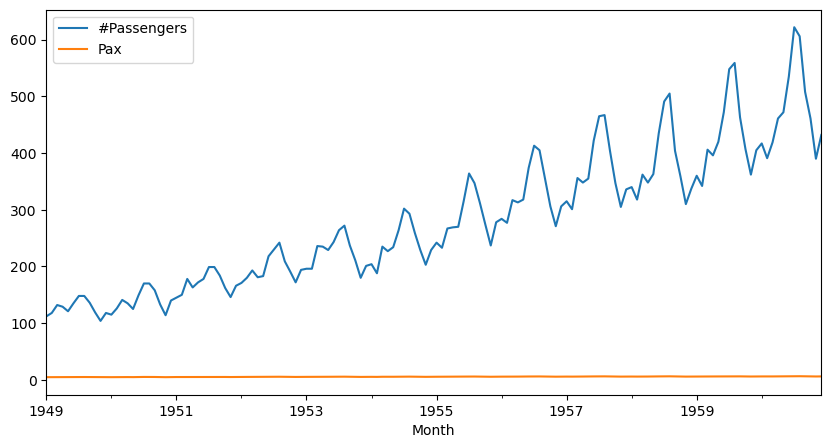

In [21]:
ds_log.plot(figsize=(10,5))
plt.show()

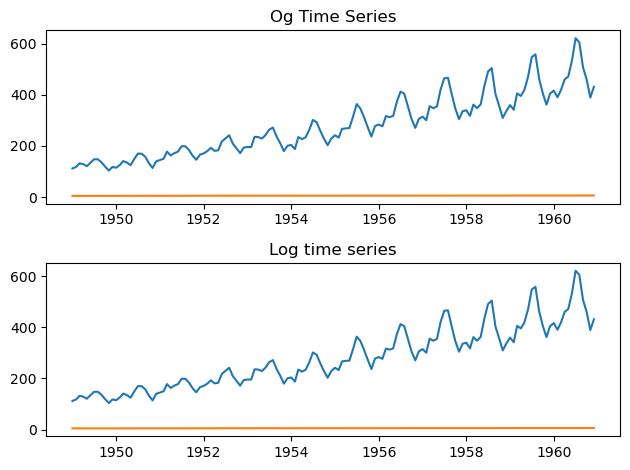

In [25]:
#Comparing with the original plt

plt.subplot(2,1,1)
plt.title('Og Time Series')
plt.plot(ds)

plt.subplot(2,1,2)
plt.title('Log time series')
plt.plot(ds_log)
plt.tight_layout()